In [18]:

!ls ../DATA

data_A.GamGam.root  data_B.GamGam.root	data_C.GamGam.root  data_D.GamGam.root


In [2]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip3 install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
print(np.__version__)


2.2.3


In [1]:

import ROOT

ModuleNotFoundError: No module named 'ROOT'

In [2]:
def plot_photon_energy():

    file = ROOT.TFile.Open("../DATA/data_A.GamGam.root")
    if not file or file.IsZombie():
        print("Error: Cannot open file!")
        return

    tree = file.Get("mini")
    if not tree:
        print("Error: TTree 'mini' not found!")
        file.Close()
        return

    if not tree.GetBranch("photon_E"):
        print("Error: Branch 'photon_E' not found!")
        file.Close()
        return

    hPhotonE = ROOT.TH1F("hPhotonE", "Photon Energy Distribution;Energy (MeV);Events", 50, 0, 400000)

    photon_E = ROOT.std.vector('float')() 
    tree.SetBranchAddress("photon_E", photon_E)
    
    nentries = tree.GetEntries()
    print(nentries)
    for i in range(nentries):
        tree.GetEntry(i)
        for energy in photon_E:
            hPhotonE.Fill(energy)

    
    c1 = ROOT.TCanvas("c1", "Photon Energy", 800, 600)
    hPhotonE.SetLineColor(ROOT.kBlue)
    hPhotonE.Draw()
    
    c1.SaveAs("photon_energy_pyroot.png")

    file.Close()

plot_photon_energy()


NameError: name 'ROOT' is not defined

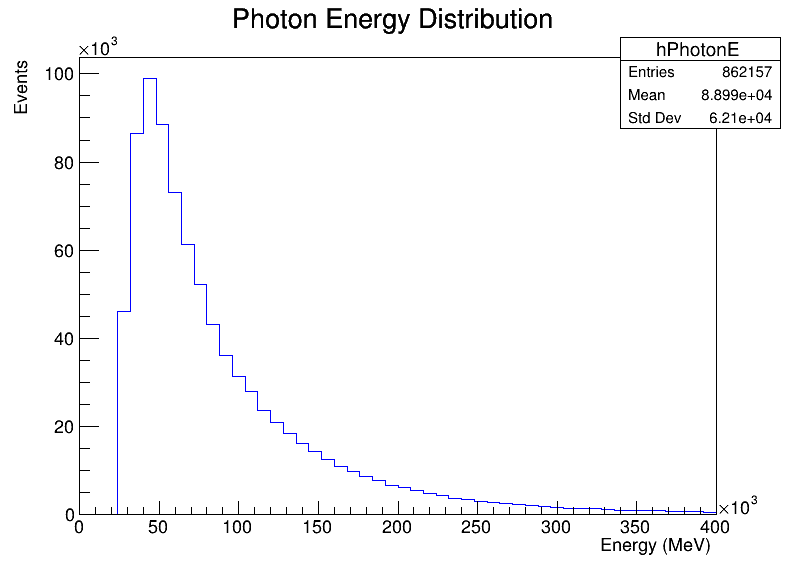

In [3]:
from IPython.display import display, Image

display(Image(filename="photon_energy_pyroot.png"))
